Data loaded from file

--- CLASSIFICATION RESULTS ---
Model                | Acc    | Prec   | Rec    | F1    
Logistic Regression  | 0.94   | 0.98   | 0.94   | 0.94
Decision Tree        | 1.00   | 1.00   | 1.00   | 1.00
Random Forest        | 0.94   | 0.98   | 0.94   | 0.94
SVM                  | 0.94   | 0.98   | 0.94   | 0.94
KNN                  | 0.91   | 0.86   | 0.91   | 0.88
Naive Bayes          | 1.00   | 1.00   | 1.00   | 1.00

--- REGRESSION RESULTS ---
Model                | R2     | MAE      | MSE     
Linear Regression    | 0.90   | 97.3    | 13728
Ridge                | 0.89   | 100.4    | 15151
Lasso                | 0.89   | 100.9    | 15326
Decision Tree        | 0.96   | 45.2    | 5988
Random Forest        | 0.97   | 42.4    | 3664
SVR                  | -0.09   | 302.1    | 154843
KNN                  | 0.93   | 53.4    | 10600

Generating Graphs...


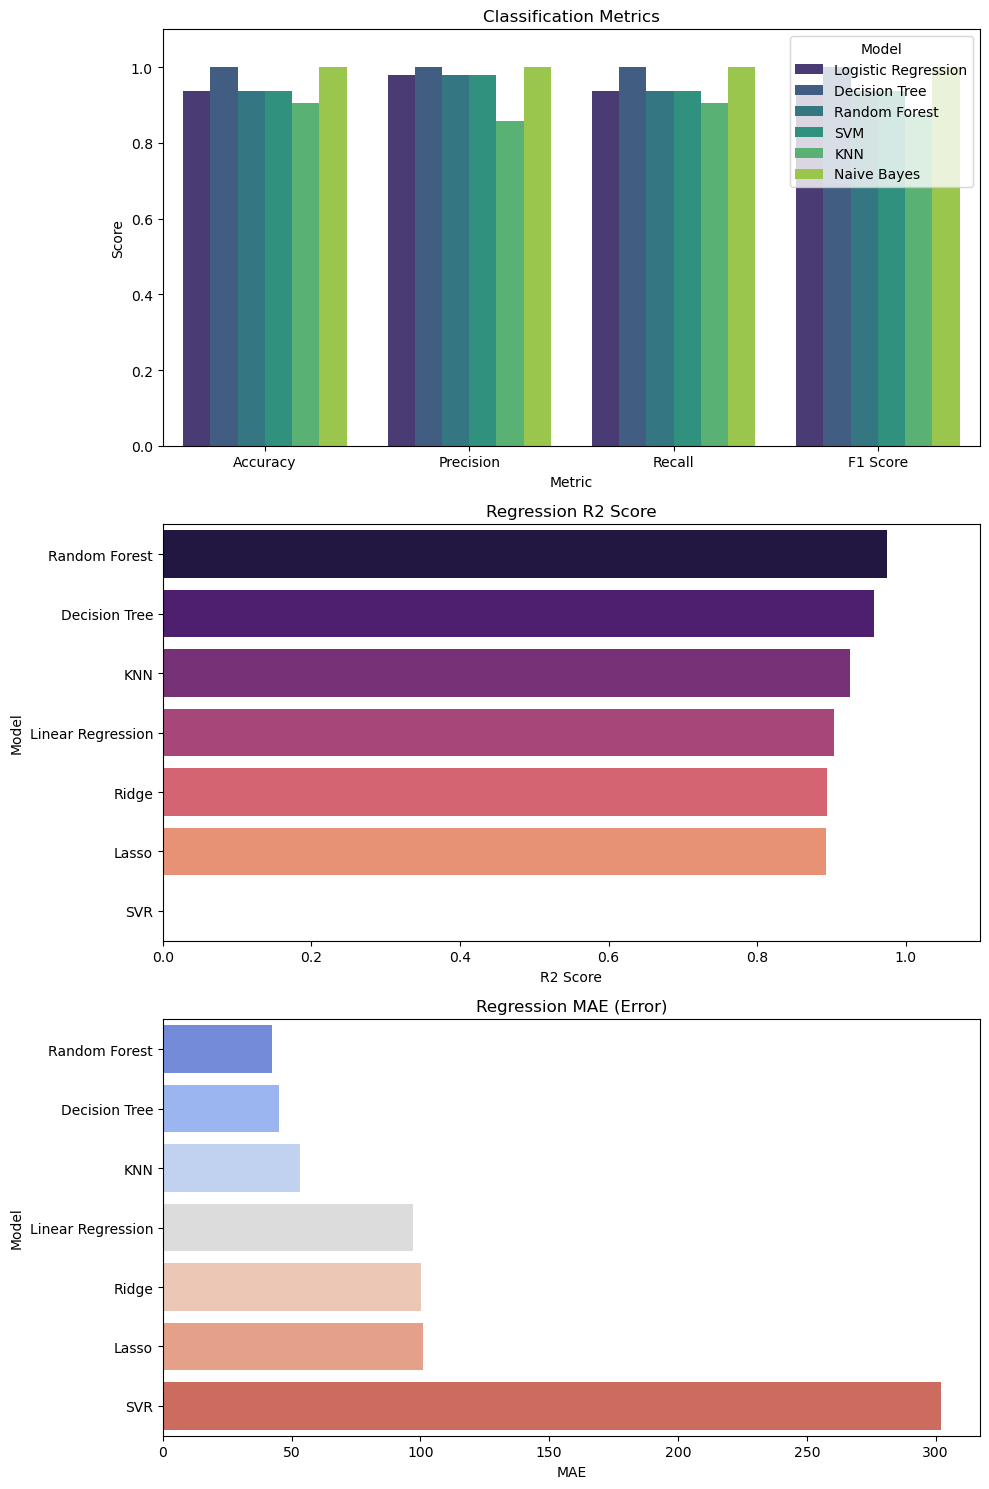

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

try:
    data = pd.read_csv('Fish.csv')
    print("Data loaded from file")
except:
    data = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Fish.csv")
    print("Data loaded from URL")

# CLASSIFICATION
print("\n--- CLASSIFICATION RESULTS ---")

X_cls = data.drop('Species', axis=1)
y_cls = data['Species']

# Scale and Split
scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)
X_train, X_test, y_train, y_test = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42)

cls_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

cls_results = []

#Header
print(f"{'Model':<20} | {'Acc':<6} | {'Prec':<6} | {'Rec':<6} | {'F1':<6}")

for name, model in cls_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    cls_results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1})
    print(f"{name:<20} | {acc:.2f}   | {prec:.2f}   | {rec:.2f}   | {f1:.2f}")


#REGRESSION
print("\n--- REGRESSION RESULTS ---")

data_reg = data.copy()
le = LabelEncoder()
data_reg['Species'] = le.fit_transform(data_reg['Species'])

X_reg = data_reg.drop('Weight', axis=1)
y_reg = data_reg['Weight']

# Scale and Split
X_reg_scaled = scaler.fit_transform(X_reg)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

reg_models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

reg_results = []

#Header
print(f"{'Model':<20} | {'R2':<6} | {'MAE':<8} | {'MSE':<8}")

for name, model in reg_models.items():
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)
    
    # Calculate Metrics
    r2 = r2_score(y_test_r, y_pred)
    mae = mean_absolute_error(y_test_r, y_pred)
    mse = mean_squared_error(y_test_r, y_pred)
    
    reg_results.append({'Model': name, 'R2 Score': r2, 'MAE': mae, 'MSE': mse})
    print(f"{name:<20} | {r2:.2f}   | {mae:.1f}    | {mse:.0f}")


# GRAPHS
print("\nGenerating Graphs...")
df_cls = pd.DataFrame(cls_results)
df_reg = pd.DataFrame(reg_results)
df_cls_melt = df_cls.melt(id_vars="Model", var_name="Metric", value_name="Score")

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graph 1: Classification
sns.barplot(x='Metric', y='Score', hue='Model', data=df_cls_melt, ax=axes[0], palette='viridis')
axes[0].set_title('Classification Metrics')
axes[0].set_ylim(0, 1.1)

# Graph 2: Regression R2 (Higher is better)
sns.barplot(x='R2 Score', y='Model', hue='Model', data=df_reg.sort_values('R2 Score', ascending=False), ax=axes[1], palette='magma', legend=False)
axes[1].set_title('Regression R2 Score')
axes[1].set_xlim(0, 1.1)

# Graph 3: Regression MAE (Lower is better)
sns.barplot(x='MAE', y='Model', hue='Model', data=df_reg.sort_values('MAE'), ax=axes[2], palette='coolwarm', legend=False)
axes[2].set_title('Regression MAE (Error)')

plt.tight_layout()
plt.show()